# Regresión Lineal Usando Python 

La regresión lineal es un método estadístico que estudia la relación lineal existente entre dos variables$^1$, es usado para generar un modelo de datos aproximado a partir de un set de datos real y poder ser utilizado, entre otras cosas, para intentar predecir resultados futuros basados en este "historico" de datos (set de datos). Se le llama regresión lineal porque el modelo generado corresponde a la ecuación de una recta $y = ax+b$.

En este documento vamos a realizar un modelo implementando la regresión lineal mediante el uso de ![python](https://www.python.org/) correspondiente al numero de personas asesinadas a causa del conflicto armado en Colombia durante el periodo de tiempo 1968-2006.

## Historia$^2$

La primera forma de regresión lineal documentada fue el método de los mínimos cuadrados que fue publicada por Legendre en 1805, Gauss publicó un trabajo en donde desarrollaba de manera más profunda el método de los mínimos cuadrados, y en dónde se incluía una versión del teorema de Gauss-Márkov.

El término regresión se utilizó por primera vez en el estudio de variables antropométricas: al comparar la estatura de padres e hijos, donde resultó que los hijos cuyos padres tenían una estatura muy superior al valor medio, tendían a igualarse a este, mientras que aquellos cuyos padres eran muy bajos tendían a reducir su diferencia respecto a la estatura media; es decir, "regresaban" al promedio. La constatación empírica de esta propiedad se vio reforzada más tarde con la justificación teórica de ese fenómeno.

El término lineal se emplea para distinguirlo del resto de técnicas de regresión, que emplean modelos basados en cualquier clase de función matemática. Los modelos lineales son una explicación simplificada de la realidad, mucho más ágiles y con un soporte teórico mucho más extenso por parte de la matemática y la estadística.

Pero bien, como se ha dicho, se puede usar el término lineal para distinguir modelos basados en cualquier clase de aplicación.

## Aplicación

Como se mencionó en la introducción, vamos a implementar la regresión lineal para generar un modelo que se aproxime a la relació que hay entre el número de personas asesinadas por año en el periodo de tiempo 1968-2006. Para lo que tenemos que obtener inicialmente un set de datos que nos brinde ésta información:

In [23]:
import pandas as pd

conflicto = pd.read_excel("C:/Users/sebas/Notebooks/tarea_regresion_lineal/Tabla_Conflicto_Armado_2.xlsx")

Estos datos son extraidos de: http://www.ideaspaz.org/especiales/data-fip/homicidios/gra.html

In [24]:
conflicto

,year,Deaths
0,1986,513
1,1987,593
2,1988,1003
3,1989,1058
4,1990,942
5,1991,1538
6,1992,1717
7,1993,1257
8,1994,1638
9,1995,1227


Una vez extraidos estos datos por medio del uso de la librería Pandas de Python la podemos graficar con ánimo de encontrar una relación o una tendencia entre este periodo de tiempo y el número de asesinados.

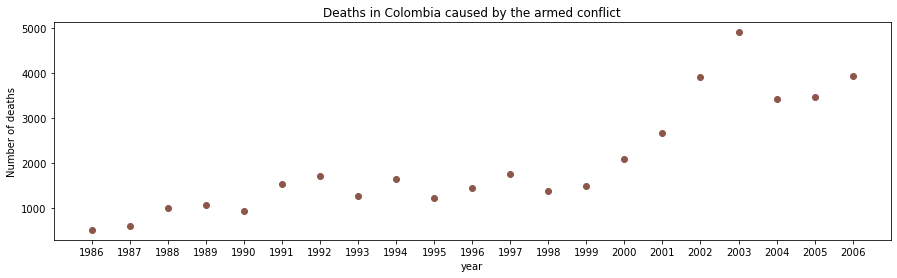

In [136]:
import matplotlib.pyplot as plt
import numpy as np

data_x = conflicto[["year"]]
year = np.array(data_x)
deaths = conflicto['Deaths'].values

fig, ax = plt.subplots()
fig.set_figwidth(15)
plt.title('Deaths in Colombia caused by the armed conflict')
plt.xlabel('year')
plt.ylabel('Number of deaths')
plt.plot(year, deaths, 'o', color='tab:brown')

plt.xticks(year)
plt.show()

Una vez vemos la grafica que modela el comportamiento de la tabla que vamos a utilizar podemos observar para éste caso que tristemente tiende a ser un comportamiento creciente. Lo que necesitamos ahora es encontrar la mejor pareja de números a y b de tal forma que la recta $y = ax+b$ se aproxime de la mejor forma al comportamiento de nuestro set de datos. 

Para ésto utilizamos una librería de Python llamada "linear_model" que nos ayuda a encontrar éstos valores.

In [144]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(year, y)
y_pred = regr.predict(year)

print('a = ', regr.coef_)
print('b = ', regr.intercept_)

a =  [171.75974026]
b =  -340833.20346320333


Por lo tanto nuestra gráfica tendrá la forma $y = (171.75974026)x-340833.20346320333$

Y al graficar la recta resultante obtendremos una gráfica que se asemeja al comportamiento de los datos de nuestra prueba:

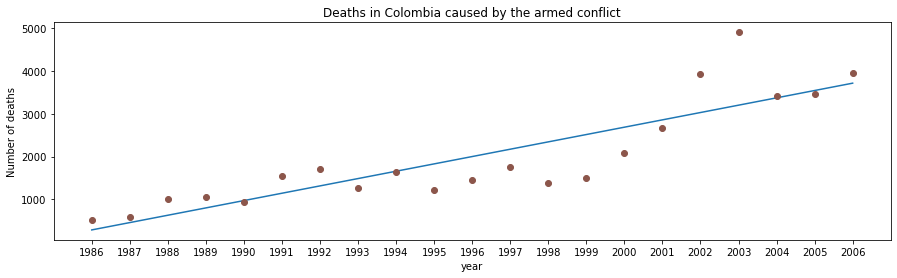

In [146]:
fig, ax = plt.subplots()
fig.set_figwidth(15)
plt.title('Deaths in Colombia caused by the armed conflict')
plt.xlabel('year')
plt.ylabel('Number of deaths')
ax.plot(year, y_pred, '-')
ax.plot(year, deaths, 'o', color='tab:brown')

plt.xticks(year)
plt.show()

## Conclusiones

- Aunque la regresión lineal es el método estadistico más sencillo para el modelamiento de datos, es una erramienta muy útil tanto para el aprendizaje como para generar aproximaciones muy acertadas según los datos que se quieran modelar

- Se puede ver claramente cómo mediante el uso de herramientas como python podemos realizar modelos lineales de forma muy sencilla y rápida.

- Parece ser que la tendencia ascendente de ésta triste estadística podría haber seguido creciendo después del 2006 de no ser por un respiro que tuvo parcialmente el país gracias al acuerdo de paz.

- Valdría la pena validar la conclusión anterior con un recopilado de datos del 2006 hasta la fecha y ver cómo va la tendencia. Y comprobar si realmente a cambiado gracias al acuerdo de paz o por el contrario sigue en asenso.

## Referencias:

1. https://www.cienciadedatos.net/documentos/24_correlacion_y_regresion_lineal
2. https://es.wikipedia.org/wiki/Regresi%C3%B3n_lineal#Historia
3. https://github.com/AprendizajeProfundo/Diplomado/blob/master/Temas/M%C3%B3dulo%201-%20Matem%C3%A1ticas%20y%20Estad%C3%ADstica/2.%20Estad%C3%ADsica%2C%20Teor%C3%ADa%20de%20la%20Decisi%C3%B3n%20y%20Teor%C3%ADa%20de%20la%20informaci%C3%B3n/Cuadernos/am_intro_regresion.ipynb
4. https://www.aprendemachinelearning.com/regresion-lineal-en-espanol-con-python/